In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from __future__ import division
from __future__ import print_function

import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

import pandas as pd
from pandas.tools.plotting import autocorrelation_plot

import seaborn as sns

from lib import utils
from lib import cols

In [3]:
# modify font size
sns.set(font_scale=1.25)

In [4]:
# load dataset
df_all_sj, df_all_iq = utils.get_df_all()
df_all_list = [df_all_sj, df_all_iq]

df_all_sj["week_start_dt"] = pd.to_datetime(df_all_sj.week_start_date)
df_all_iq["week_start_dt"] = pd.to_datetime(df_all_iq.week_start_date)

col_orig_feats = cols.ndvi + cols.precipitation + cols.reanalysis + cols.station

df_train_sj = df_all_sj[~df_all_sj.total_cases.isnull()]
df_train_iq = df_all_iq[~df_all_iq.total_cases.isnull()]



## Basic stats

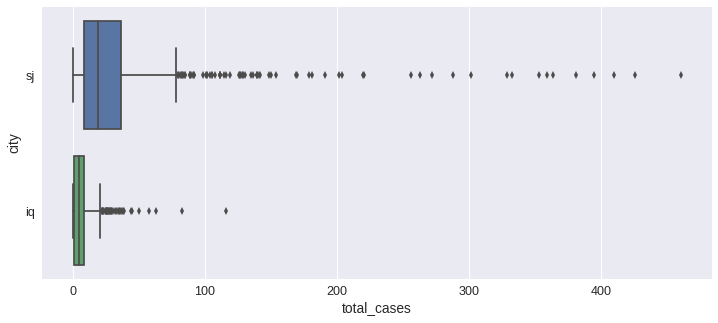

In [5]:
plt.figure(figsize=(12, 5))
pd.concat([df_train_sj[["total_cases", "city"]], df_train_iq[["total_cases", "city"]]]).pipe(lambda df: sns.boxplot(x=df.total_cases, y=df.city, orient="h"))
plt.savefig("./img/total_cases_box.svg", bbox_inches='tight')

In [6]:
desc_sj = df_train_sj.total_cases.describe()
desc_sj["std/mean"] = desc_sj["std"] / desc_sj["mean"]
desc_sj["median/mean"] = desc_sj["50%"] / desc_sj["mean"]
desc_sj

count          936.000000
mean            34.180556
std             51.381372
min              0.000000
25%              9.000000
50%             19.000000
75%             37.000000
max            461.000000
std/mean         1.503234
median/mean      0.555872
Name: total_cases, dtype: float64

In [7]:
desc_iq = df_train_iq.total_cases.describe()
desc_iq["std/mean"] = desc_iq["std"] / desc_iq["mean"]
desc_iq["median/mean"] = desc_iq["50%"] / desc_iq["mean"]
desc_iq

count          520.000000
mean             7.565385
std             10.765478
min              0.000000
25%              1.000000
50%              5.000000
75%              9.000000
max            116.000000
std/mean         1.422992
median/mean      0.660905
Name: total_cases, dtype: float64

In [8]:
# statistical test
sp.stats.ttest_ind(df_train_sj.total_cases, df_train_iq.total_cases)

Ttest_indResult(statistic=11.668928249162132, pvalue=3.8655976442311165e-30)

## Time series of tatget value

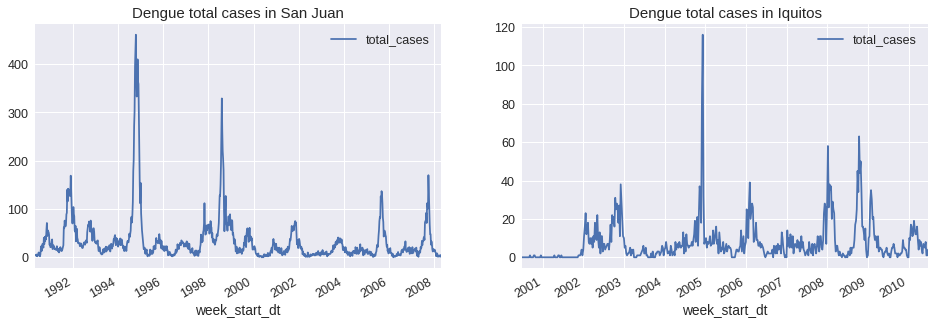

In [9]:
plt.figure(figsize=(16, 5))
ax = plt.subplot(1, 2, 1)
df_train_sj.plot(x="week_start_dt", y="total_cases", ax = ax, title="Dengue total cases in San Juan")
ax = plt.subplot(1, 2, 2)
df_train_iq.plot(x="week_start_dt", y="total_cases", ax = ax, title="Dengue total cases in Iquitos")
#plt.savefig("./img/time_series_of_total_cases.svg", bbox_inches='tight')

## Time series of all features

In [10]:
df_sj = df_all_sj
df_iq = df_all_iq
col_dt = "week_start_dt"
sj_test = "2008-04-29"
iq_test = "2010-07-02"

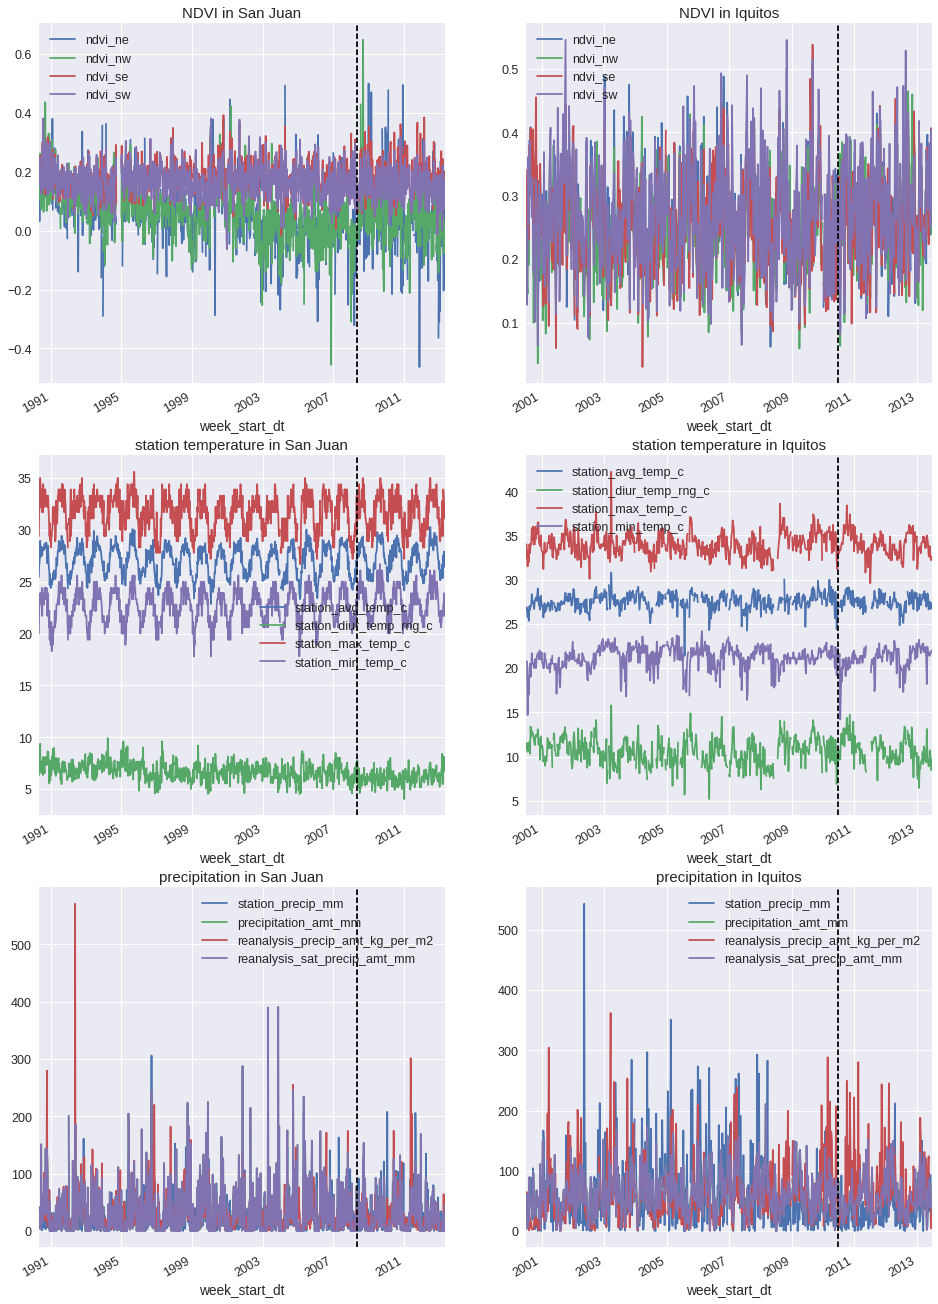

In [11]:
plt.figure(figsize=(16, 25))
nrow  = 3
ncol = 2

ax = plt.subplot(nrow, ncol, 1)
df_sj.plot(x=col_dt, y=cols.ndvi, ax = ax, title="NDVI in San Juan")
plt.axvline(x=sj_test, linestyle='--', color='black')

ax = plt.subplot(nrow, ncol, 2)
df_iq.plot(x=col_dt, y=cols.ndvi, ax = ax, title="NDVI in Iquitos")
plt.axvline(x=iq_test, linestyle='--', color='black')

ax = plt.subplot(nrow, ncol, 3)
df_sj.plot(x=col_dt, y=cols.station_temp, ax = ax, title="station temperature in San Juan")
plt.axvline(x=sj_test, linestyle='--', color='black')

ax = plt.subplot(nrow, ncol, 4)
df_iq.plot(x=col_dt, y=cols.station_temp, ax = ax, title="station temperature in Iquitos")
plt.axvline(x=iq_test, linestyle='--', color='black')

ax = plt.subplot(nrow, ncol, 5)
df_sj.plot(x=col_dt, y=["station_precip_mm", "precipitation_amt_mm"] + cols.reanalysis_precip, ax = ax, title="precipitation in San Juan")
plt.axvline(x=sj_test, linestyle='--', color='black')

ax = plt.subplot(nrow, ncol, 6)
df_iq.plot(x=col_dt, y=["station_precip_mm", "precipitation_amt_mm"] + cols.reanalysis_precip, ax = ax, title="precipitation in Iquitos")
plt.axvline(x=iq_test, linestyle='--', color='black')

plt.savefig("./img/time_series_of_features_1.svg", bbox_inches='tight')

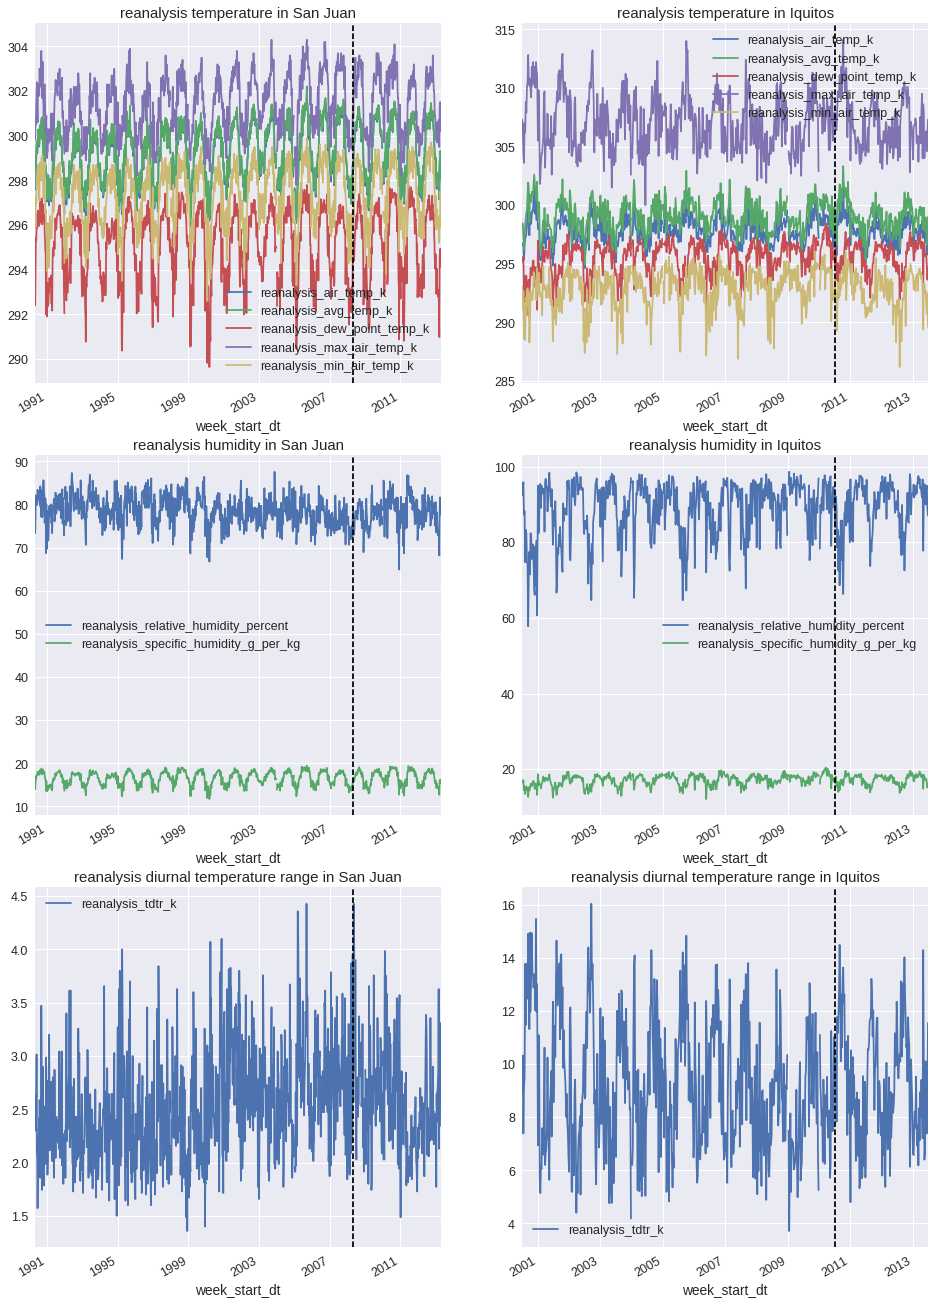

In [12]:
plt.figure(figsize=(16, 25))
nrow = 3
ncol = 2
ax = plt.subplot(nrow, ncol, 1)
df_sj.plot(x=col_dt, y=cols.reanalysis_temp, ax = ax, title="reanalysis temperature in San Juan")
plt.axvline(x=sj_test, linestyle='--', color='black')

ax = plt.subplot(nrow, ncol, 2)
df_iq.plot(x=col_dt, y=cols.reanalysis_temp, ax = ax, title="reanalysis temperature in Iquitos")
plt.axvline(x=iq_test, linestyle='--', color='black')

ax = plt.subplot(nrow, ncol, 3)
df_sj.plot(x=col_dt, y=cols.reanalysis_humidity, ax = ax, title="reanalysis humidity in San Juan")
plt.axvline(x=sj_test, linestyle='--', color='black')

ax = plt.subplot(nrow, ncol, 4)
df_iq.plot(x=col_dt, y=cols.reanalysis_humidity, ax = ax, title="reanalysis humidity in Iquitos")
plt.axvline(x=iq_test, linestyle='--', color='black')

ax = plt.subplot(nrow, ncol, 5)
df_sj.plot(x=col_dt, y=cols.reanalysis_tdtr_k, ax = ax, title="reanalysis diurnal temperature range in San Juan")
plt.axvline(x=sj_test, linestyle='--', color='black')

ax = plt.subplot(nrow, ncol, 6)
df_iq.plot(x=col_dt, y=cols.reanalysis_tdtr_k, ax = ax, title="reanalysis diurnal temperature range in Iquitos")
plt.axvline(x=iq_test, linestyle='--', color='black')

plt.savefig("./img/time_series_of_features_2.svg", bbox_inches='tight')

## Missing values

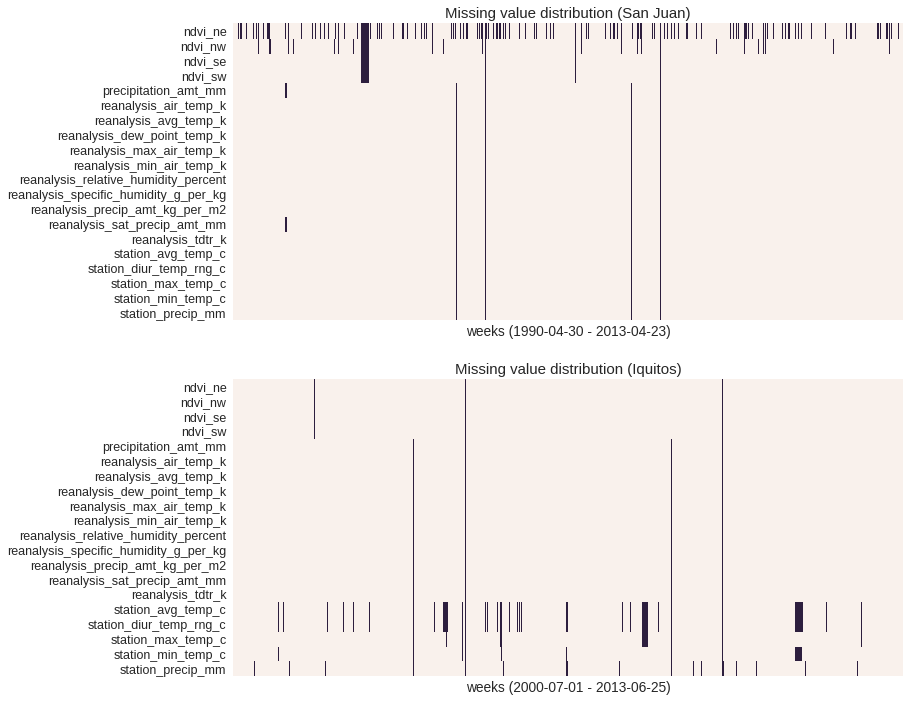

In [13]:
plt.figure(figsize=(12, 12))
plt.subplot(2, 1, 1)
hm = sns.heatmap(df_sj[col_orig_feats].isnull().astype(int).T, xticklabels=False, yticklabels=True, cbar=False)
hm.set_title("Missing value distribution (San Juan)")
hm.set_xlabel("weeks (1990-04-30 - 2013-04-23)")
plt.subplot(2, 1, 2)
hm = sns.heatmap(df_iq[col_orig_feats].isnull().astype(int).T, xticklabels=False, yticklabels=True, cbar=False)
hm.set_title("Missing value distribution (Iquitos)")
hm.set_xlabel("weeks (2000-07-01 - 2013-06-25)")

#plt.savefig("./img/missing_values.svg", bbox_inches='tight')
plt.savefig("./img/missing_values.png", bbox_inches='tight')

## Monthly variations

In [14]:
df_all_list = [utils.set_month(df) for df in df_all_list]

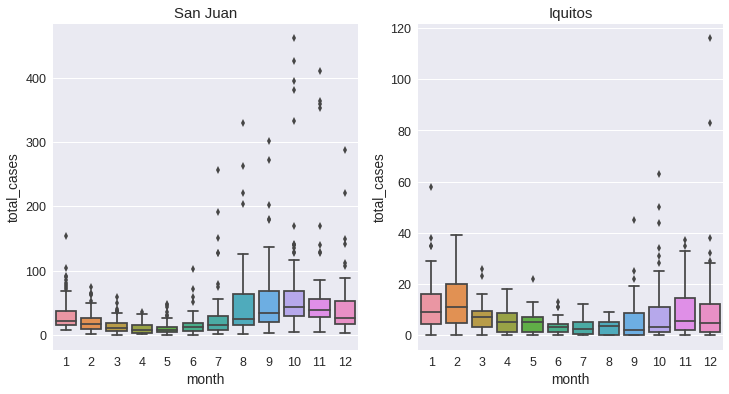

In [15]:
plt.figure(figsize=(12, 6))
ax = plt.subplot(1, 2, 1)
ax.set_title("San Juan")
sns.boxplot(data=df_all_sj, x="month", y="total_cases")

ax = plt.subplot(1, 2, 2)
ax.set_title("Iquitos")
sns.boxplot(data=df_all_iq, x="month", y="total_cases")

plt.savefig("./img/monthly_average.svg", bbox_inches='tight')

## Auto correlation function

In [16]:
for df in [df_all_sj, df_all_iq]:
    utils.fill_na(df)
    
for df in [df_train_sj, df_train_iq]:
    utils.fill_na(df)

/home/akiyuki/.pyenv/versions/miniconda2-4.1.11/envs/mle-capstone/lib/python2.7/site-packages/pandas/core/indexing.py:477: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
lib/utils.py:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df[col] = df[col].interpolate()


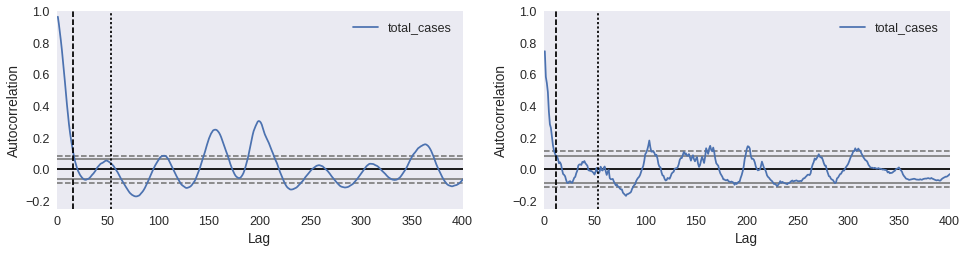

In [17]:
plt.figure(figsize=(16, 8))

ax = plt.subplot(2, 2, 1)
autocorrelation_plot(df_train_sj.total_cases, ax=ax, label="total_cases")
ax.set_xlim((0, 400))
ax.set_ylim((-0.25, 1.00))
plt.axvline(53, color='k', linestyle=':')
plt.axvline(16, color='k', linestyle='--')

ax = plt.subplot(2, 2, 2)
ax = autocorrelation_plot(df_train_iq.total_cases, ax=ax, label="total_cases")
ax.set_xlim((0, 400))
ax.set_ylim((-0.25, 1.00))
plt.axvline(53, color='k', linestyle=':')
plt.axvline(12, color='k', linestyle='--')
plt.savefig("./img/auto_correlations.svg", bbox_inches='tight')

In [18]:
high_ac_sj, middle_ac_sj, low_ac_sj = utils.get_autocorr_at(df_train_sj, col_orig_feats)
high_ac_iq, middle_ac_iq, low_ac_iq = utils.get_autocorr_at(df_train_iq, col_orig_feats)

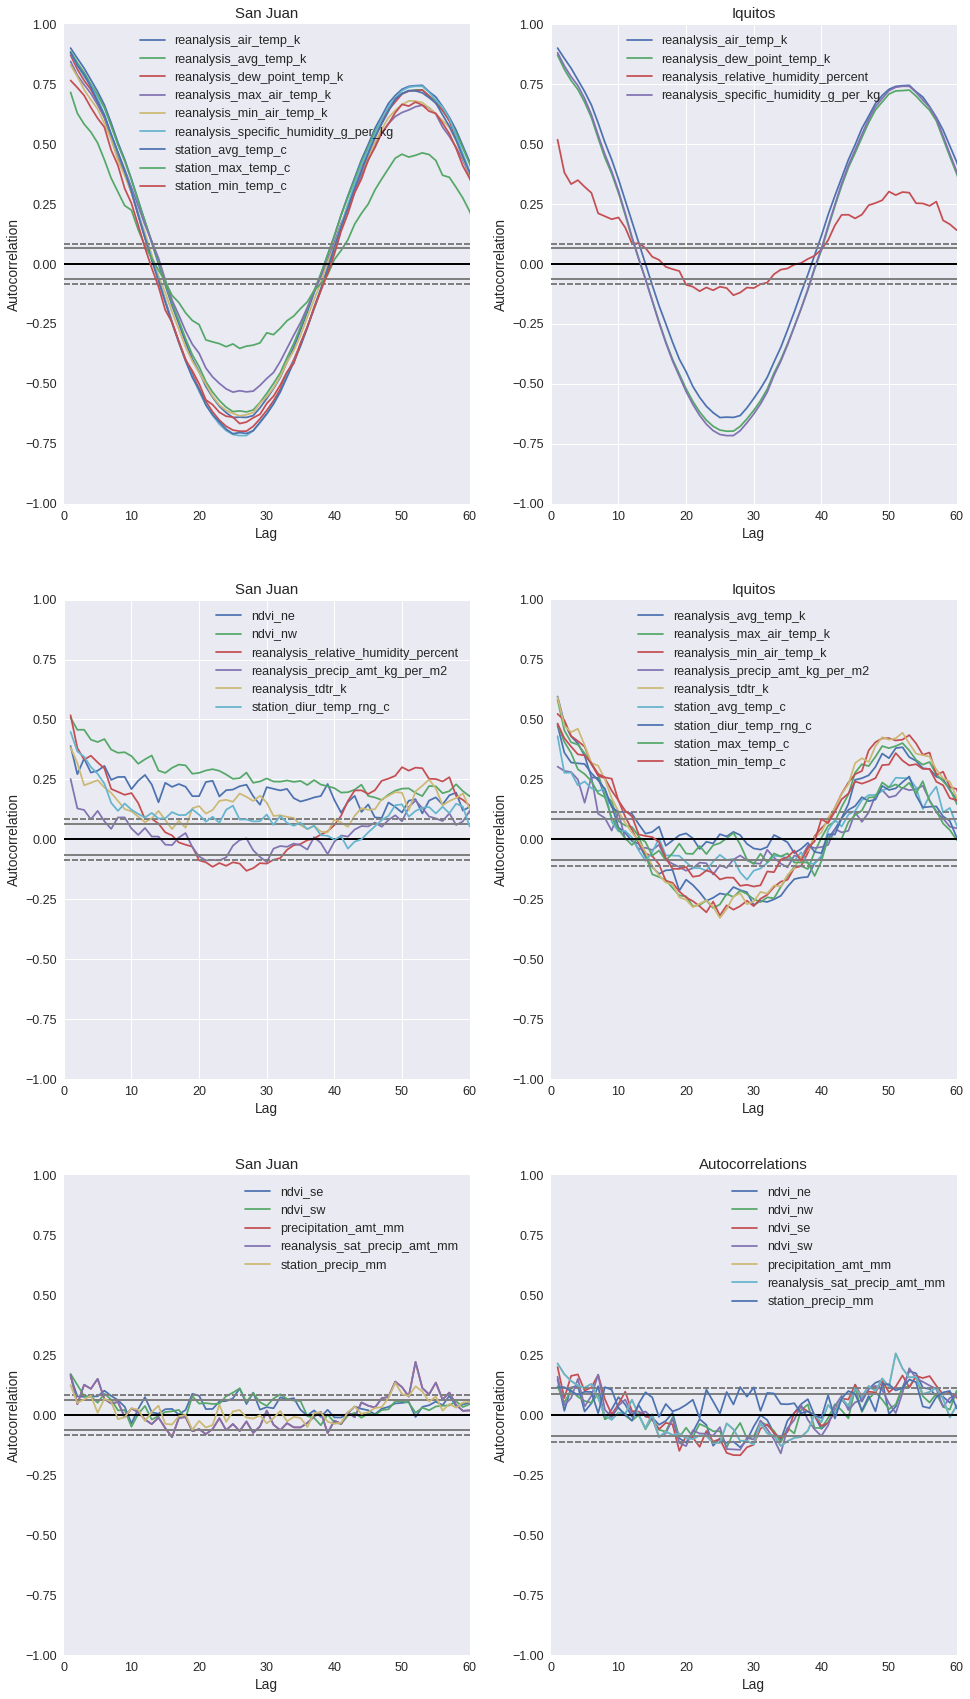

In [19]:
plt.figure(figsize=(16, 30))

ax = plt.subplot(3, 2, 1)
ax.set_xlim((0, 60))
ax.set_ylim((-1.0, 1.00))
ax.set_title("San Juan")
for col in high_ac_sj:
    autocorrelation_plot(df_train_sj[col], ax=ax, label=col)

ax = plt.subplot(3, 2, 2)
ax.set_xlim((0, 60))
ax.set_ylim((-1.0, 1.00))
ax.set_title("Iquitos")
for col in high_ac_iq:
    autocorrelation_plot(df_train_sj[col], ax=ax, label=col)

    
ax = plt.subplot(3, 2, 3)
ax.set_xlim((0, 60))
ax.set_ylim((-1.0, 1.00))
ax.set_title("San Juan")
for col in middle_ac_sj:
    autocorrelation_plot(df_train_sj[col], ax=ax, label=col)

ax = plt.subplot(3, 2, 4)
ax.set_xlim((0, 60))
ax.set_ylim((-1.0, 1.00))
ax.set_title("Iquitos")
for col in middle_ac_iq:
    autocorrelation_plot(df_train_iq[col], ax=ax, label=col)

    
ax = plt.subplot(3, 2, 5)
ax.set_xlim((0, 60))
ax.set_ylim((-1.0, 1.00))
ax.set_title("San Juan")
for col in low_ac_sj:
    autocorrelation_plot(df_train_sj[col], ax=ax, label=col)

    
ax = plt.subplot(3, 2, 6)
ax.set_xlim((0, 60))
ax.set_ylim((-1.0, 1.00))
ax.set_title("Iquitos")
for col in low_ac_iq:
    autocorrelation_plot(df_train_iq[col], ax=ax, label=col)

    
plt.title('Autocorrelations')
plt.savefig("./img/auto_correlations_all.svg", bbox_inches='tight')

## Feature correlation

In [20]:
# compute the correlations
sj_corr = df_train_sj.corr()
iq_corr = df_train_iq.corr()

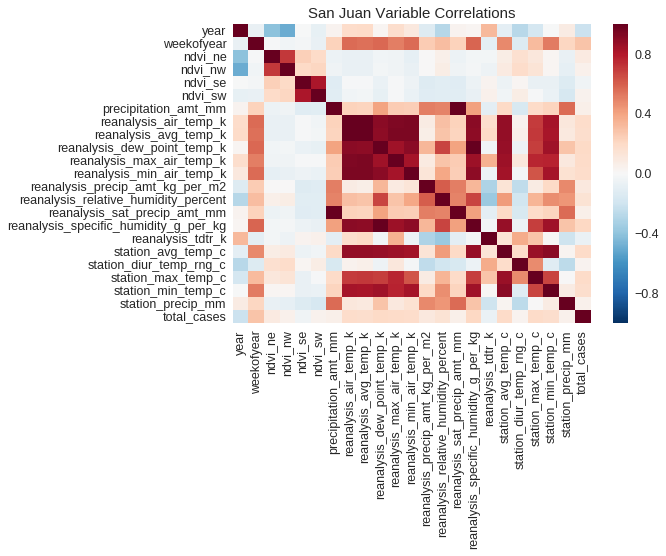

In [21]:
# plot san juan
sj_corr_heat = sns.heatmap(sj_corr)
plt.title('San Juan Variable Correlations')
plt.savefig("./img/feat_correlations_sj.svg", bbox_inches='tight')

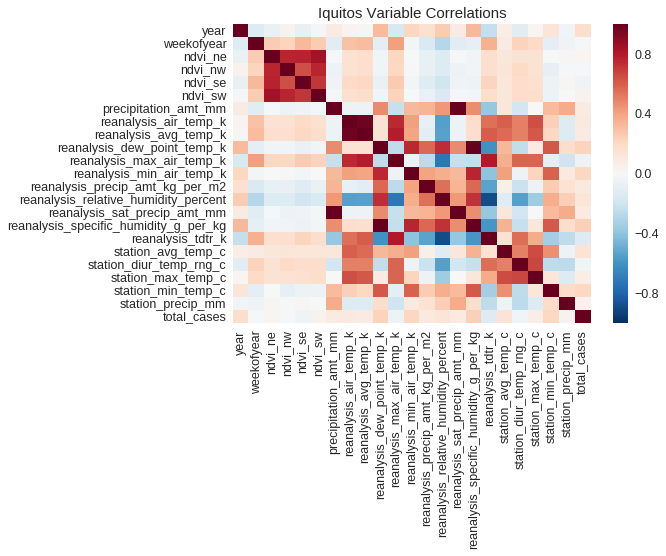

In [22]:
# plot iquitos
iq_corr_heat = sns.heatmap(iq_corr)
plt.title('Iquitos Variable Correlations')
plt.savefig("./img/feat_correlations_iq.svg", bbox_inches='tight')

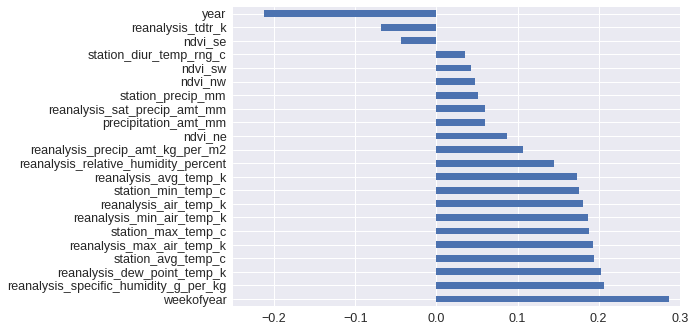

In [23]:
# San Juan
(sj_corr
     .total_cases
     .drop('total_cases') # don't compare with myself
     .sort_values(ascending=False)
     .plot
     .barh(xlim=(-0.25, 0.3)))
plt.savefig("./img/target_correlations_sj.svg", bbox_inches='tight')

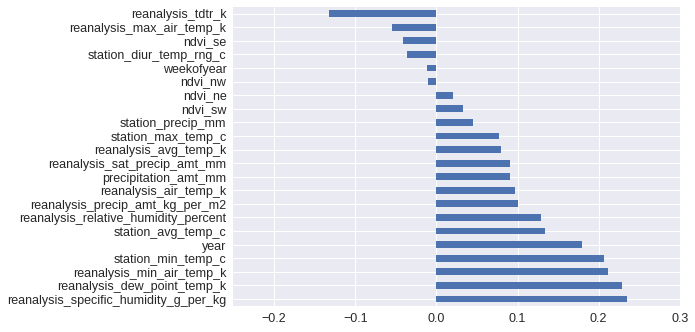

In [24]:
# Iquitos
(iq_corr
     .total_cases
     .drop('total_cases') # don't compare with myself
     .sort_values(ascending=False)
     .plot
     .barh(xlim=(-0.25, 0.3)))
plt.savefig("./img/target_correlations_iq.svg", bbox_inches='tight')

## Distribution of target value

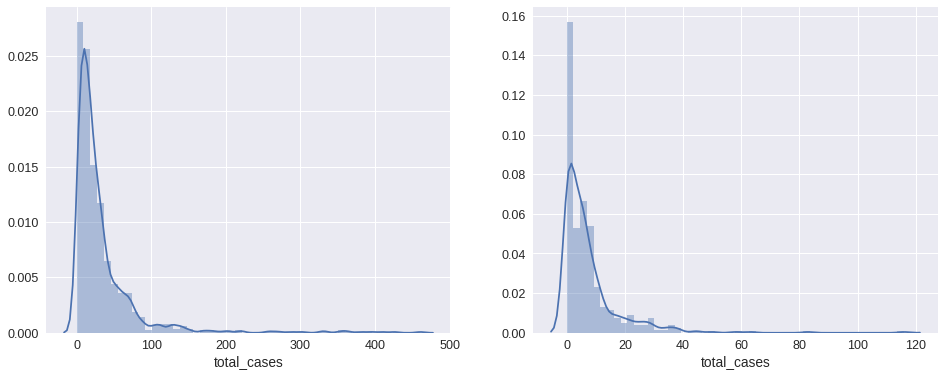

In [25]:
plt.figure(figsize=(16, 6))
plt.subplot(1, 2, 1)
sns.distplot(df_train_sj.total_cases)
plt.subplot(1, 2, 2)
sns.distplot(df_train_iq.total_cases)

## Combining distribution and time series

/home/akiyuki/.pyenv/versions/miniconda2-4.1.11/envs/mle-capstone/lib/python2.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/home/akiyuki/.pyenv/versions/miniconda2-4.1.11/envs/mle-capstone/lib/python2.7/site-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


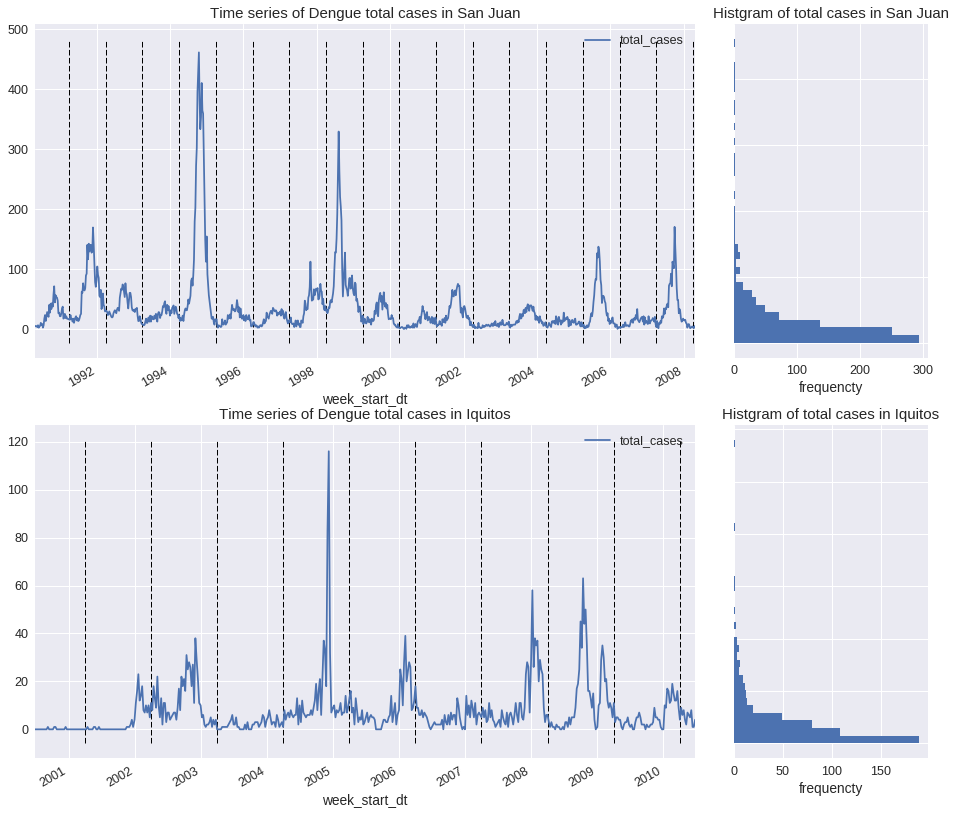

In [26]:
plt.figure(figsize=(16, 15))

##
ax = plt.subplot2grid((2,4), (0, 0), colspan=3)
df_train_sj["week_start_dt"] = pd.to_datetime(df_train_sj.week_start_date)
df_train_sj.plot(x="week_start_dt", y="total_cases", ax = ax, title="Time series of Dengue total cases in San Juan")
ymin, ymax = ax.get_ylim()
dt_range = pd.date_range(start=pd.datetime(1990, 4, 1), periods=19, freq=pd.DateOffset(years=1))
ax.vlines(x=dt_range  , ymin=ymin, ymax=ymax-1, linestyles='--', lw=1)

ax = plt.subplot2grid((2,4), (0,3), colspan=1)
ax.set_title("Histgram of total cases in San Juan")
ax.set_xlabel("frequencty")
df_train_sj.total_cases.hist(orientation='horizontal', ax=ax, bins=40)
_ = plt.setp(ax.get_yticklabels(), visible=False)

## 
ax = plt.subplot2grid((2,4), (1, 0), colspan=3)
df_train_iq["week_start_dt"] = pd.to_datetime(df_train_iq.week_start_date)
df_train_iq.plot(x="week_start_dt", y="total_cases", ax = ax, title="Time series of Dengue total cases in Iquitos")
ymin, ymax = ax.get_ylim()
dt_range = pd.date_range(start=pd.datetime(2000, 4, 1), periods=11, freq=pd.DateOffset(years=1))
ax.vlines(x=dt_range  , ymin=ymin, ymax=ymax-1, linestyles='--', lw=1)

ax = plt.subplot2grid((2,4), (1,3), colspan=1)
ax.set_title("Histgram of total cases in Iquitos")
ax.set_xlabel("frequencty")
df_train_iq.total_cases.hist(orientation='horizontal', ax=ax, bins=40)
_ = plt.setp(ax.get_yticklabels(), visible=False)

plt.savefig("./img/time_series_of_total_cases.svg", bbox_inches='tight')